# Autoregressive moving average

## Install packages

In [0]:
 #!git clone https://github.com/arpitsharma9/01-Artificial-Intelligence.git

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving helper.py to helper.py
Saving quiz_tests.py to quiz_tests.py
Saving requirements.txt to requirements.txt
Saving tests.py to tests.py
User uploaded file "helper.py" with length 3684 bytes
User uploaded file "quiz_tests.py" with length 1409 bytes
User uploaded file "requirements.txt" with length 138 bytes
User uploaded file "tests.py" with length 6506 bytes


In [0]:
import quiz_tests

In [43]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [44]:
!pip3 install statsmodels

In [0]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import seaborn as sns
import quiz_tests

In [0]:
sns.set()
#note that for the figure size to show, this cell should be run
#separately from the import of pyplot
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate return series with autoregressive properties

In [27]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(200)

ar_params = np.array([1, -0.5])
ma_params = np.array([1, -0.3])
## 1260 samples will be generated. 
##Autoregressive and moving average parameters will be bounded using the above parameters when fitted into ARMA equation
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)
print (ar_params,ma_params,ret.size)
ret = pd.Series(ret)
#print(ret.max)
drift = 100

## cumulative function will add the returns..
price = pd.Series(np.cumsum(ret)) + drift
#print(pd.Series(np.cumsum(ret)))

[ 1.  -0.5] [ 1.  -0.3] 1260


[ 1.   -0.75  0.25] [1.   0.65 0.35]


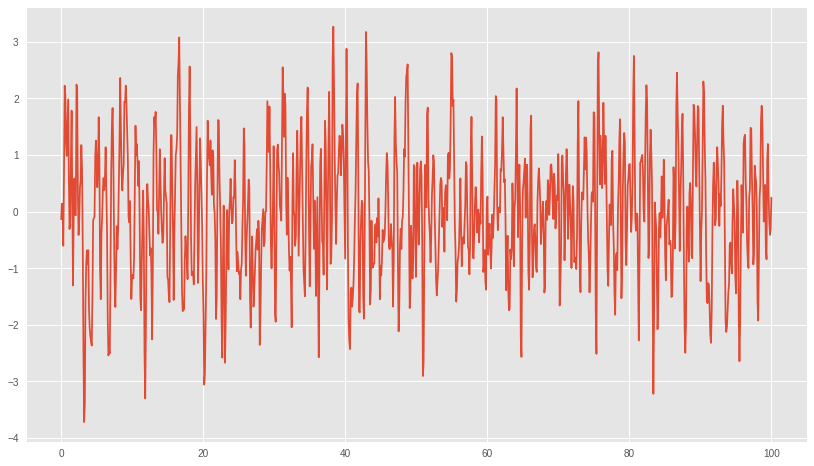

In [16]:
##number of point of the time series
nsample = 1024
## simulate a simple sinusoidal function
x1 = np.linspace(0, 100, nsample)
y=np.sin(x1)

from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)

arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
print(arparams,maparam)
y = arma_generate_sample(arparams, maparams, nsample)
fig, ax = plt.subplots()
ax.plot(x1, y, label="Data") 

### log returns

In [0]:
## here we are calculating the difference between log return of current price and previous share price 
lret = np.log(price) - np.log(price.shift(1))
## the first value of log return will be NAN .. that is the reason we are slicing data from 1 to end.
lret = lret[1:]
#print(price,price.shift(1))

In [38]:
## we used lret.values to convert it from pandas series object to numpy array.
type(lret.values), type(lret)

(numpy.ndarray, pandas.core.series.Series)

## Quiz Solution: ARIMA

Fit an autoregressive integrated moving average model.  Choose an order of integration of 1, autoregresion lag of 1, and moving average lag of 1.

Check out the [stats model arima](http://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.arima_model.ARMAResults.html) documentation to help you.

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
def fit_arima(lret):
    
    #TODO: choose autoregression lag of 1
    AR_lag_p = 1
    
    #TODO: choose moving average lag of 1
    MA_lag_q = 1
    
    #TODO: choose order of integration 1
    order_of_integration_d = 1
    
    #TODO: Create a tuple of p,d,q
    order = (AR_lag_p, order_of_integration_d, MA_lag_q)
    
    #TODO: create an ARIMA model object, passing in the values of the lret pandas series,
    # and the tuple containing the (p,d,q) order arguments
    arima_model = ARIMA(lret.values, order=order)
    arima_result = arima_model.fit()
    
    #TODO: from the result of calling ARIMA.fit(),
    # save and return the fitted values, autoregression parameters, and moving average parameters
    fittedvalues = arima_result.fittedvalues
    arparams = arima_result.arparams
    maparams = arima_result.maparams
    #print(fittedvalues,arparams,maparams)
   
    return fittedvalues,arparams,maparams

quiz_tests.test_fit_arima(fit_arima)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Tests Passed


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


fitted AR parameter 0.21, MA parameter -0.98


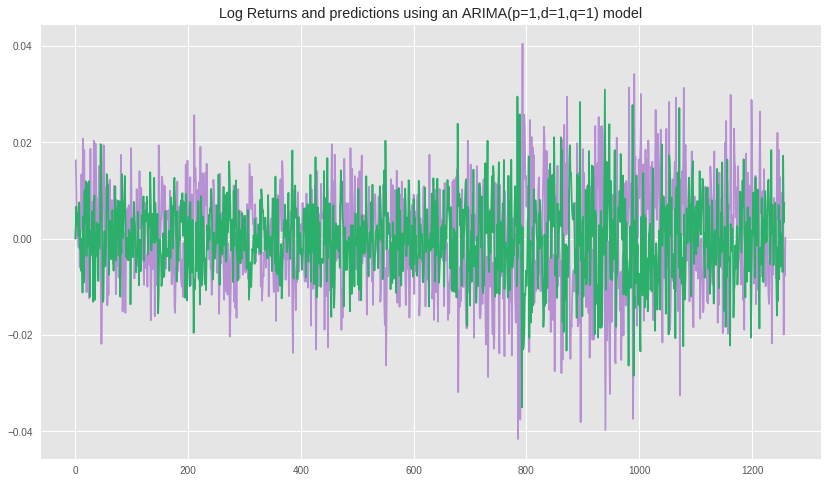

In [47]:
fittedvalues,arparams,maparams = fit_arima(lret)
arima_pred = pd.Series(fittedvalues)
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")